# Tenor saxophone (allowing brass)
### Determine how many components is a good number of components

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
NUM_LABEL_COLS = 13
#  sop, alto, tenr, bari, 
# tora, clrt, othr, trmp, 
# trmb, otrb, ext, excl, batch
RANDOM_SEED = 0
TEST_SIZE = 0.2
df = pd.read_pickle('./data/5s/labeled/features_r02/all_data.pkl')

In [4]:
df_filtered = df
df_filtered.shape

(9080, 10790)

In [5]:
# exclude records we want to exclude
df_filtered = df_filtered[df_filtered['alto'] == '0'] 
df_filtered = df_filtered[df_filtered['sop'] == '0']
df_filtered = df_filtered[df_filtered['bari'] == '0']
df_filtered = df_filtered[df_filtered['clrt'] == '0']
df_filtered = df_filtered[df_filtered['tora'] == '0']
df_filtered = df_filtered[df_filtered['othr'] == '0']

num_x_cols = df_filtered.shape[1] - NUM_LABEL_COLS - 1  
# ^ last bit to adjust for zero indexing
data = df_filtered.iloc[:, 1:num_x_cols].to_numpy() 
# ^ these are the features
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

target = df_filtered[['tenr']].to_numpy().ravel()
# ^ this is the label
target.shape

(7594,)

In [6]:
xs = [n for n in range(4, 60, 1)]
ys = []
for x in xs:
    pca = PCA(n_components=x)
    pca.fit(data)
    d = pca.transform(data)
    x_train, x_test, y_train, y_test = \
        train_test_split(d, target, test_size=TEST_SIZE, 
                         random_state=RANDOM_SEED)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ys.append(clf.score(x_test, y_test))

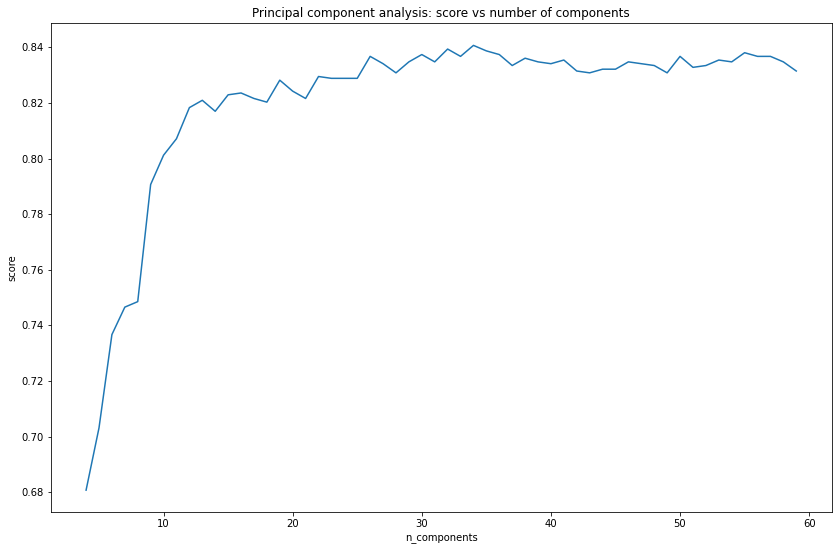

In [7]:
fig = plt.figure(figsize=(14, 9))    
plt.plot(xs, ys)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title("Principal component analysis: score vs number of components")
pass


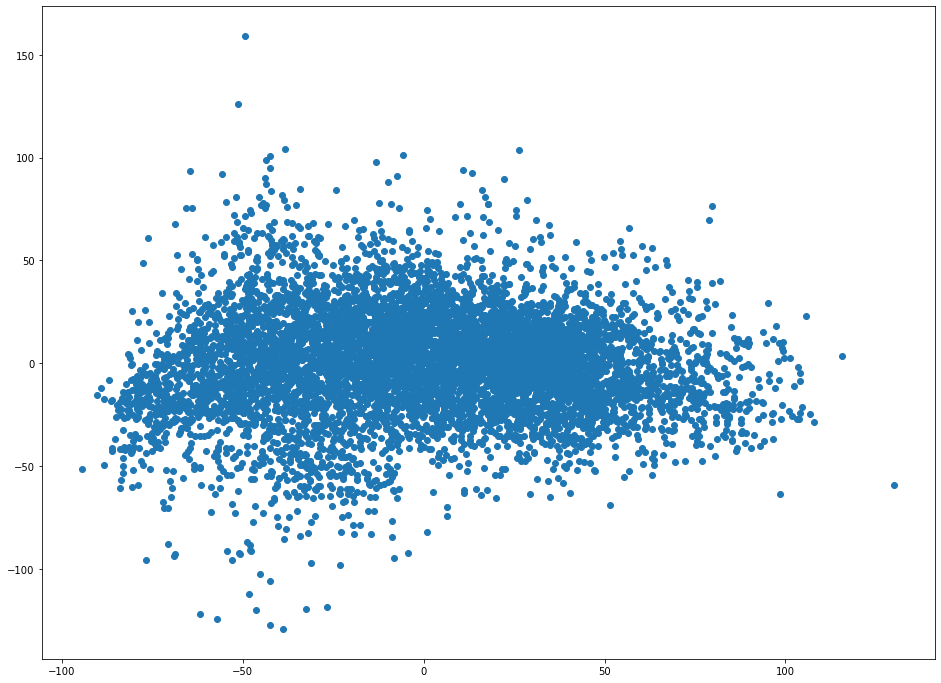

In [8]:
reduced_data = PCA(n_components=2).fit_transform(data)
fig = plt.figure(figsize=(16, 12))
s = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=None)

In [9]:
pca = PCA()
pca.fit(data)

PCA()

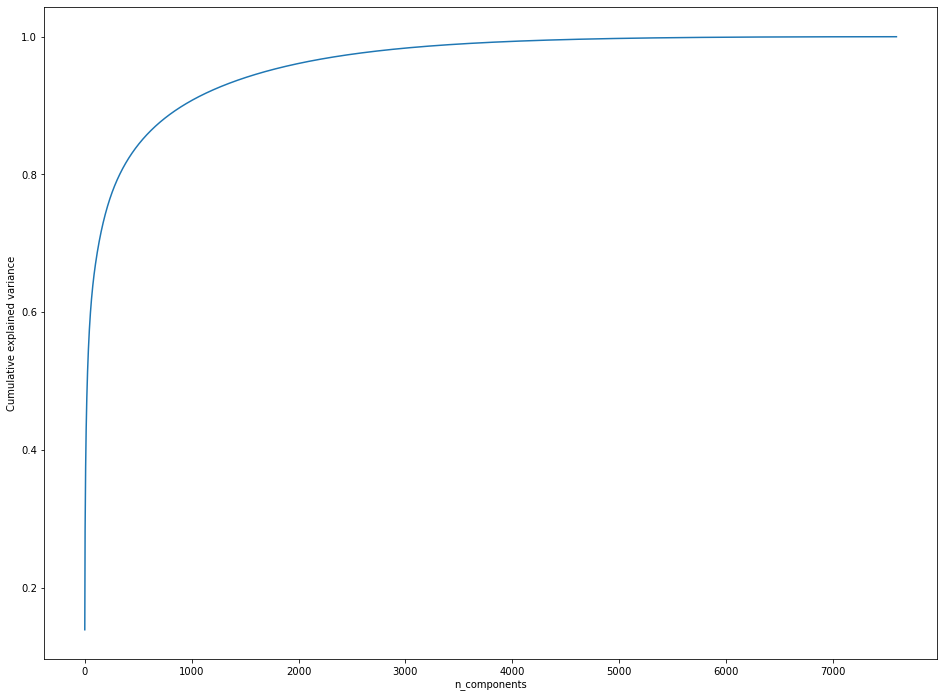

In [10]:
fig = plt.figure(figsize=(16, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance');

In [11]:
pca = PCA(0.50).fit(data)
pca.n_components_

25

In [13]:
pca = PCA(0.55).fit(data)
pca.n_components_


37

In [14]:
pca = PCA(0.54).fit(data)
pca.n_components_

34